In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, List
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.checkpoint.memory import MemorySaver

from dotenv import load_dotenv


load_dotenv()

f:\Gen AI Repos\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
model = ChatOpenAI(
    model="gpt-3.5-turbo"
)

In [3]:
class ChatState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [4]:
def joke_generation(state: ChatState):
     prompt = f"Generate Joke on this topic - {state['topic']}"

     response = model.invoke(prompt).content

     return {"joke": response}


In [5]:
def explanation_generation(state: ChatState):

    prompt = f"Explain the following joke - {state['joke']}"
    response = model.invoke(prompt).content

    return {"explanation": response}

In [6]:
checkpointer = MemorySaver()

In [7]:
graph = StateGraph(ChatState)

graph.add_node("joke_generation",joke_generation)
graph.add_node("explanation_generation", explanation_generation)

graph.add_edge(START, "joke_generation")
graph.add_edge("joke_generation", "explanation_generation")
graph.add_edge("explanation_generation", END)

workflow = graph.compile(checkpointer=checkpointer)



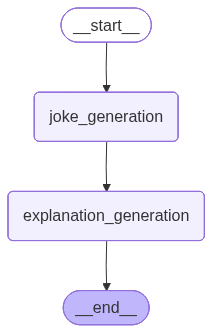

In [8]:
workflow

In [9]:
intial_state = {
    "topic": "pizza"
}
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke(intial_state,config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little saucy!',
 'explanation': 'This joke is a play on words. In this context, "saucy" can mean two things: 1) having a bold or cheeky attitude, and 2) literally being covered in sauce (like pizza). So, when the pizza went to the doctor because it was feeling "saucy," it could mean that the pizza was feeling bold and wanted to seek medical attention, or it could mean that the pizza was feeling covered in sauce and needed medical help. The humor comes from the double meaning of the word "saucy."'}

In [10]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little saucy!', 'explanation': 'This joke is a play on words. In this context, "saucy" can mean two things: 1) having a bold or cheeky attitude, and 2) literally being covered in sauce (like pizza). So, when the pizza went to the doctor because it was feeling "saucy," it could mean that the pizza was feeling bold and wanted to seek medical attention, or it could mean that the pizza was feeling covered in sauce and needed medical help. The humor comes from the double meaning of the word "saucy."'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-2763-61b7-8002-86c5644cd139'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T16:11:58.954044+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-0df5-6ff4-8001-3c315cb94e07'}}, tasks=(), interrupts

In [11]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little saucy!', 'explanation': 'This joke is a play on words. In this context, "saucy" can mean two things: 1) having a bold or cheeky attitude, and 2) literally being covered in sauce (like pizza). So, when the pizza went to the doctor because it was feeling "saucy," it could mean that the pizza was feeling bold and wanted to seek medical attention, or it could mean that the pizza was feeling covered in sauce and needed medical help. The humor comes from the double meaning of the word "saucy."'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-2763-61b7-8002-86c5644cd139'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T16:11:58.954044+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-0df5-6ff4-8001-3c315cb94e07'}}, tasks=(), interrupt

In [12]:
intial_state = {
    "topic": "pasta"
}
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke(intial_state,config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta go to the doctor?\nIt was feeling a little penne-cil.',
 'explanation': 'This joke is a play on words. "Penne" is a type of pasta, and "penicil" sounds similar to "pencill," which is a slang term for feeling unwell or sick. So the joke is saying that the pasta went to the doctor because it was feeling sick, using a pun on the word "penne" to make the joke funny.'}

In [13]:
workflow.get_state(config=config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the doctor?\nIt was feeling a little penne-cil.', 'explanation': 'This joke is a play on words. "Penne" is a type of pasta, and "penicil" sounds similar to "pencill," which is a slang term for feeling unwell or sick. So the joke is saying that the pasta went to the doctor because it was feeling sick, using a pun on the word "penne" to make the joke funny.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-b694-6c32-8002-92bdcb2f1720'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T16:12:13.969072+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-ac6d-69ec-8001-9529a38d4076'}}, tasks=(), interrupts=())

In [14]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the doctor?\nIt was feeling a little penne-cil.', 'explanation': 'This joke is a play on words. "Penne" is a type of pasta, and "penicil" sounds similar to "pencill," which is a slang term for feeling unwell or sick. So the joke is saying that the pasta went to the doctor because it was feeling sick, using a pun on the word "penne" to make the joke funny.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-b694-6c32-8002-92bdcb2f1720'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T16:12:13.969072+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecacc-ac6d-69ec-8001-9529a38d4076'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the doctor?\nIt was feeling a little penne-cil.'}, next=('explanation_generation',), config={'configu

In [15]:
workflow.invoke({"topic": "pizza with AI"}, config=config1)

{'topic': 'pizza with AI',
 'joke': 'Why did the AI refuse to order pizza?\n\nBecause it kept saying "I can\'t make a decision, I\'m too pepper-plexed!"',
 'explanation': 'This joke is a play on words. The term "pepper-plexed" is a combination of "pepperoni" (a common pizza topping) and "perplexed" (meaning confused or unsure). The joke is implying that the AI is unable to make a decision because it is too confused or unsure, but it is using a pun with "pepper-plexed" to refer to its inability to choose a pizza topping.'}

In [16]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza with AI', 'joke': 'Why did the AI refuse to order pizza?\n\nBecause it kept saying "I can\'t make a decision, I\'m too pepper-plexed!"', 'explanation': 'This joke is a play on words. The term "pepper-plexed" is a combination of "pepperoni" (a common pizza topping) and "perplexed" (meaning confused or unsure). The joke is implying that the AI is unable to make a decision because it is too confused or unsure, but it is using a pun with "pepper-plexed" to refer to its inability to choose a pizza topping.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad0-7369-678a-8006-45e4245e81c0'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2026-01-08T16:13:54.300008+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad0-6270-6182-8005-c5befaf6026b'}}, tasks=(), interrupts=())

In [17]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza with AI', 'joke': 'Why did the AI refuse to order pizza?\n\nBecause it kept saying "I can\'t make a decision, I\'m too pepper-plexed!"', 'explanation': 'This joke is a play on words. The term "pepper-plexed" is a combination of "pepperoni" (a common pizza topping) and "perplexed" (meaning confused or unsure). The joke is implying that the AI is unable to make a decision because it is too confused or unsure, but it is using a pun with "pepper-plexed" to refer to its inability to choose a pizza topping.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad0-7369-678a-8006-45e4245e81c0'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2026-01-08T16:13:54.300008+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad0-6270-6182-8005-c5befaf6026b'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza with AI', 'joke': 'Why

In [19]:
workflow.invoke({"topic": "pasta with AI"}, config=config2)


{'topic': 'pasta with AI',
 'joke': 'Why did the pasta take a computer science class? \nTo get better at al-dente calculations thanks to AI!',
 'explanation': 'This joke is a play on words with a pun. "Al dente" is a term used to describe pasta that is cooked to be firm to the bite. In this joke, the pasta is taking a computer science class in order to get better at "al-dente calculations" using AI, which stands for artificial intelligence. So, the humor comes from the clever wordplay on "al dente" and "AI" in the context of a pasta wanting to improve its cooking skills through technology.'}

In [20]:
workflow.get_state(config=config2)


StateSnapshot(values={'topic': 'pasta with AI', 'joke': 'Why did the pasta take a computer science class? \nTo get better at al-dente calculations thanks to AI!', 'explanation': 'This joke is a play on words with a pun. "Al dente" is a term used to describe pasta that is cooked to be firm to the bite. In this joke, the pasta is taking a computer science class in order to get better at "al-dente calculations" using AI, which stands for artificial intelligence. So, the humor comes from the clever wordplay on "al dente" and "AI" in the context of a pasta wanting to improve its cooking skills through technology.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad7-2edc-6e9c-8007-20d7f8992483'}}, metadata={'source': 'loop', 'step': 7, 'parents': {}}, created_at='2026-01-08T16:16:55.016663+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad7-23ce-6731-8006-ccfda7608dc6'}}, tasks=(), interru

In [22]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'pasta with AI', 'joke': 'Why did the pasta take a computer science class? \nTo get better at al-dente calculations thanks to AI!', 'explanation': 'This joke is a play on words with a pun. "Al dente" is a term used to describe pasta that is cooked to be firm to the bite. In this joke, the pasta is taking a computer science class in order to get better at "al-dente calculations" using AI, which stands for artificial intelligence. So, the humor comes from the clever wordplay on "al dente" and "AI" in the context of a pasta wanting to improve its cooking skills through technology.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad7-2edc-6e9c-8007-20d7f8992483'}}, metadata={'source': 'loop', 'step': 7, 'parents': {}}, created_at='2026-01-08T16:16:55.016663+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecad7-23ce-6731-8006-ccfda7608dc6'}}, tasks=(), interr